In [1]:
import csv
import skimage
from skimage import data
from numpy import array
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#x[0:3]+x[3:]

In [3]:
csv.register_dialect('myDialect',
delimiter = ',',
skipinitialspace=True)
trainImages=[]
trainLabels=[]
testImages=[]
testLabels=[]
with open('trainVal.csv','r') as csvFile:
    reader = csv.reader(csvFile,dialect='myDialect')
    for row in reader:
        if row[3]=='1':
            img=skimage.data.imread(row[1])
            img = skimage.transform.resize(img,(40,200,3))
            
            
            #### face different length of license
            x_trainLabel=str(row[2])
            if len(x_trainLabel)==7:
                trainImages.append(img)
                trainLabels.append(x_trainLabel[0:3]+'#'+x_trainLabel[3:])
            if len(x_trainLabel)==6:
                trainImages.append(img)
                trainLabels.append(x_trainLabel[0:3]+'..'+x_trainLabel[3:])
            if len(x_trainLabel)==5:
                trainImages.append(img)
                trainLabels.append(x_trainLabel[0]+'###'+x_trainLabel[1:])
                
#         if row[3]=='0':
#             img=skimage.data.imread(row[1])
#             img = skimage.transform.resize(img,(40,200,3))
            
            
#             x_testLabel=str(row[2])
#             if len(x_testLabel)==7:
#                 testImages.append(img)
#                 testLabels.append(x_testLabel[0:3]+'#'+x_testLabel[3:])
#             if len(x_testLabel)==6:
#                 testImages.append(img)
#                 testLabels.append(x_testLabel[0:3]+'..'+x_testLabel[3:])
#             if len(x_trainLabel)==5:
#                 testImages.append(img)
#                 testLabels.append(x_testLabel[0]+'###'+x_testLabel[1:])
        
        #print(row,row[3])
        

/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [4]:
len(trainImages),len(trainLabels)

(105671, 105671)

/usr/local/lib/python3.5/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


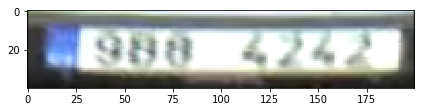

In [5]:
skimage.io.imshow(trainImages[100001])

In [6]:
trainLabels[100001]

'9B8#4242'

In [7]:
len(testLabels),len(testImages)

(0, 0)

In [8]:
#skimage.io.imshow(testImages[10001])

In [9]:
#testLabels[10001]

In [10]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.utils import np_utils

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [11]:
# define universe of possible input values
alphabet = '0123456789abcdefghijklmnopqrstuvwxyz#. '.upper()

In [12]:
# define a mapping of chars to integers
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))

In [13]:
len(alphabet)

39

In [14]:
len(testLabels)

0

In [15]:
#print how many license less than 8 characters
i=0
for label in trainLabels:
    if len(label)<8:
        print(label)
        i=i+1

In [16]:
#skimage.io.imshow('s04_l01/882_1.png')

In [17]:
#skimage.io.imshow('s01_l01/142_1.png')

In [18]:
#skimage.io.imshow('s02_l01/1212_1.png')

In [19]:
#one hot encoding labels
list_trainLabels=list()
list_testLabels=list()
for label in trainLabels:
    train_encoded = [char_to_int[char] for char in label]
    for value in train_encoded:
        letter = [0 for _ in range(len(alphabet))]
        letter[value] = 1
        list_trainLabels.append(letter)

In [20]:
# for testlabel in testLabels:
#     test_encoded = [char_to_int[char] for char in testlabel]
#     for value in test_encoded:
#         letter = [0 for _ in range(len(alphabet))]
#         letter[value] = 1
#         list_testLabels.append(letter)

In [21]:
#len(trainLabels)*8,len(testLabels)*8

In [22]:
#x = np.reshape(list_trainLabels,(len(trainLabels)*8,39))

In [23]:
#y= np.reshape(list_testLabels,(len(testLabels)*8,39))

In [24]:
#x[0:8]

In [25]:
####check the correct encoding
# for i in range(1000*8,1000*8+16):
#     print(trainLabels[1000])
#     print(int_to_char[argmax(x[i])])


In [26]:
###############data struture

In [97]:
trainY=np.reshape(list_trainLabels,(len(trainLabels),8,39)).astype("float32")
#testY=np.reshape(list_testLabels,(len(testLabels),8,39))

In [59]:
trainX=trainImages
#testX=testImages

In [29]:
# trainX=np.array(trainX)
# trainY=np.array(trainY)
# testX=np.array(testX)
# testY=np.array(testY)

In [30]:
type(trainX[0])

numpy.ndarray

In [31]:
type(trainY[0])

numpy.ndarray

In [96]:
trainY[0]

array([[0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 

In [33]:
trainX[0].shape,trainY[0].shape,len(trainX),len(trainY)

((40, 200, 3), (8, 39), 105671, 105671)

In [34]:
type(trainY)

numpy.ndarray

In [94]:
trainY

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [35]:
#skimage.io.imshow(trainX[10000])

In [36]:
for ttt in trainY[10000]:
    print(int_to_char[argmax(ttt)])
    

6
B
5
#
3
1
0
6


In [60]:
Input(shape=trainX[0].shape)

<tf.Tensor 'input_1:0' shape=(?, 40, 200, 3) dtype=float32>

In [100]:
trainX[0].shape

(40, 200, 3)

In [118]:
from keras.models import Sequential,Model
from keras.layers import Dense, Conv2D, Flatten,Activation,MaxPooling2D,Input
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import concatenate
from keras import layers
import tensorflow as tf

#create model
model = Sequential()
#add model layers


Input_1= Input(shape=(40,200,3))
conv1 = Conv2D(32, (3,3), activation = 'relu', padding = "SAME")(Input_1)
pool1 = MaxPooling2D(pool_size = (2,2), strides = 2)(conv1)

flat_1 = Flatten()(pool1)
#x = Dense(100, activation='relu')(flat_1)
# x = Dense(100, activation='relu')(x)
x = Dense(50, activation='relu')(flat_1)

out1 = Dense(39,  activation='softmax')(x)
out2 = Dense(39,  activation='softmax')(x)
out3 = Dense(39,  activation='softmax')(x)
out4 = Dense(39,  activation='softmax')(x)
out5 = Dense(39,  activation='softmax')(x)
out6 = Dense(39,  activation='softmax')(x)
out7 = Dense(39,  activation='softmax')(x)
out8 = Dense(39,  activation='softmax')(x)
output_1=[out1,out2,out3,out4,out5,out6,out7,out8]
model = Model(inputs=[Input_1], outputs=output_1)
# model = Model(inputs=Input_1, outputs=[layer.get_output_shape_at(out1)
#                                        ,layer.get_output_shape_at(out2)
#                                        ,layer.get_output_shape_at(out3)
#                                        ,layer.get_output_shape_at(out4)
#                                        ,layer.get_output_shape_at(out5)
#                                        ,layer.get_output_shape_at(out6)
#                                        ,layer.get_output_shape_at(out7)
#                                        ,layer.get_output_shape_at(out8)
#                                        ])
model.compile(optimizer = "Adam", loss = 'categorical_crossentropy',metrics=['accuracy'])







"""
main=model.add(Conv2D(32, kernel_size=3,padding='same',input_shape=trainX[0].shape))
main=model.add(BatchNormalization())
main=model.add(Activation('relu'))
main=model.add(MaxPooling2D(pool_size=(2, 2)))

main=model.add(Conv2D(64, kernel_size=3, padding='same'))
main=model.add(BatchNormalization())
main=model.add(Activation('relu'))
main=model.add(MaxPooling2D(pool_size=(2, 2)))
main=model.add(Conv2D(128, kernel_size=3, padding='same'))
main=model.add(BatchNormalization())
main=model.add(Activation('relu'))
main=model.add(MaxPooling2D(pool_size=(2, 2)))


o1 = Dense(16000,  activation='linear')(main)
d1= Dense(128,  activation='linear')(o1)
s1=Dense(39, activation = 'softmax')(d1)
o2 = Dense(16000,  activation='linear')(main)
d2= Dense(128,  activation='linear')(o2)
s2=Dense(39, activation = 'softmax')(d2)
# o2 = Dense(16000, activation = 'softmax')(main)
# o3 = Dense(16000, activation = 'softmax')(main)
# o4 = Dense(16000, activation = 'softmax')(main)
# o5 = Dense(16000, activation = 'softmax')(main)
# o6 = Dense(16000, activation = 'softmax')(main)
# o7 = Dense(16000, activation = 'softmax')(main)
# o8 = Dense(16000, activation = 'softmax')(main)

"""

"\nmain=model.add(Conv2D(32, kernel_size=3,padding='same',input_shape=trainX[0].shape))\nmain=model.add(BatchNormalization())\nmain=model.add(Activation('relu'))\nmain=model.add(MaxPooling2D(pool_size=(2, 2)))\n\nmain=model.add(Conv2D(64, kernel_size=3, padding='same'))\nmain=model.add(BatchNormalization())\nmain=model.add(Activation('relu'))\nmain=model.add(MaxPooling2D(pool_size=(2, 2)))\nmain=model.add(Conv2D(128, kernel_size=3, padding='same'))\nmain=model.add(BatchNormalization())\nmain=model.add(Activation('relu'))\nmain=model.add(MaxPooling2D(pool_size=(2, 2)))\n\n\no1 = Dense(16000,  activation='linear')(main)\nd1= Dense(128,  activation='linear')(o1)\ns1=Dense(39, activation = 'softmax')(d1)\no2 = Dense(16000,  activation='linear')(main)\nd2= Dense(128,  activation='linear')(o2)\ns2=Dense(39, activation = 'softmax')(d2)\n# o2 = Dense(16000, activation = 'softmax')(main)\n# o3 = Dense(16000, activation = 'softmax')(main)\n# o4 = Dense(16000, activation = 'softmax')(main)\n# o5 

In [119]:
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 40, 200, 3)   0                                            
__________________________________________________________________________________________________
conv2d_18 (Conv2D)              (None, 40, 200, 32)  896         input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_17 (MaxPooling2D) (None, 20, 100, 32)  0           conv2d_18[0][0]                  
__________________________________________________________________________________________________
flatten_17 (Flatten)            (None, 64000)        0           max_pooling2d_17[0][0]           
__________________________________________________________________________________________________
dense_158 

In [120]:
output_1

[<tf.Tensor 'dense_159/Softmax:0' shape=(?, 39) dtype=float32>,
 <tf.Tensor 'dense_160/Softmax:0' shape=(?, 39) dtype=float32>,
 <tf.Tensor 'dense_161/Softmax:0' shape=(?, 39) dtype=float32>,
 <tf.Tensor 'dense_162/Softmax:0' shape=(?, 39) dtype=float32>,
 <tf.Tensor 'dense_163/Softmax:0' shape=(?, 39) dtype=float32>,
 <tf.Tensor 'dense_164/Softmax:0' shape=(?, 39) dtype=float32>,
 <tf.Tensor 'dense_165/Softmax:0' shape=(?, 39) dtype=float32>,
 <tf.Tensor 'dense_166/Softmax:0' shape=(?, 39) dtype=float32>]

In [121]:
#trainX[0].shape

In [141]:
n_epoch = 2
model.fit(np.array(trainX[0:10]),np.array(trainY[0:10]),batch_size = 2 , epochs=n_epoch, shuffle=False,verbose=1)

ValueError: Error when checking model target: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 8 array(s), but instead got the following list of 1 arrays: [array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., ...

In [89]:
len(trainX),len(trainY)

(105671, 105671)

In [142]:
trainY[0]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.,

In [124]:
model.train_on_batch(trainX[0:10], trainY[0:10],sample_weight=5)

ValueError: Error when checking model input: the list of Numpy arrays that you are passing to your model is not the size the model expected. Expected to see 1 array(s), but instead got the following list of 10 arrays: [array([[[0.25941176, 0.34676471, 0.54      ],
        [0.34147059, 0.45794118, 0.71558824],
        [0.33264706, 0.44911765, 0.70676471],
        ...,
        [0.39705882, 0.49588235, 0.72882353],
  ...

In [ ]:
len(trainY[0])

In [ ]:
[trainY[0],trainY[0],trainY[0],trainY[0],trainY[0],trainY[0],trainY[0],trainY[0]

In [146]:
trainX[0:10][0]

array([[[0.25941176, 0.34676471, 0.54      ],
        [0.34147059, 0.45794118, 0.71558824],
        [0.33264706, 0.44911765, 0.70676471],
        ...,
        [0.39705882, 0.49588235, 0.72882353],
        [0.37941176, 0.47823529, 0.71117647],
        [0.27794118, 0.35205882, 0.52676471]],

       [[0.29852941, 0.39558824, 0.61029412],
        [0.39245098, 0.52186275, 0.80813725],
        [0.38127451, 0.51068627, 0.79696078],
        ...,
        [0.44117647, 0.55098039, 0.80980392],
        [0.42705882, 0.53686275, 0.79568627],
        [0.315     , 0.39735294, 0.59147059]],

       [[0.30294118, 0.4       , 0.61764706],
        [0.39852941, 0.52794118, 0.81813725],
        [0.3877451 , 0.51715686, 0.80735294],
        ...,
        [0.43088235, 0.54852941, 0.81323529],
        [0.42598039, 0.54362745, 0.80833333],
        [0.31764706, 0.40588235, 0.60441176]],

       ...,

       [[0.10147059, 0.11029412, 0.13676471],
        [0.13578431, 0.14754902, 0.18284314],
        [0.13676471, 0

In [133]:
img=trainY[0]

In [134]:
img.shape

(8, 39)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.,

In [139]:
iii=img.reshape(3,-1)

In [140]:
iii.shape

(3, 104)